<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Classification Analysis | Apprentice Chef dataset </h2>
<h4>Machine Learning</h4><br>
Christian Romero - MsBA 2
Hult International Business School<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>
<h2>Goal: </h2><br>
Build amachine learning model to classify if a customer will respon to the new campaign "Halfway there".
<br><br>
<h2>Objectives: </h2><br>
a) Obtain a classification model with a AUC higher than 0.83 <br>
b) Test-train gap less than 0.05
<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# IMPORTING LIBRARIES

In [1]:
#Importing my libraries, import dataset and add a wider screen option for better visualization

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # train/test split

from sklearn.ensemble import GradientBoostingClassifier #GBM

from sklearn.inspection import permutation_importance 

from sklearn.metrics import confusion_matrix 

from sklearn.metrics import roc_auc_score 

# HYPERPARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer  

# libraries for classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus 


from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score  


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# IMPORTING OUR DATA

In [2]:
file = "Apprentice_Chef_Dataset.xlsx"

dataset = pd.read_excel(io=file)

# DEFINING SOME FUNCTIONS

In [3]:
def text_split_feature(col, df, sep=' ', new_col_name='NUMBER_OF_NAMES'):
    
    df[new_col_name] = 0
    
    for index, val in df.iterrows():
        
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
  

def display_tree(tree, feature_df, height = 500, width = 800):
    
    dot_data = StringIO()
    
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

def plot_feature_importances(model, train):
    n_features = train.shape[1]
    fig, ax = plt.subplots(figsize=(12,9))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature") 
    

def visual_cm(true_y, pred_y, labels = None):

    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

# FEATURE ENGINEERING (DUMMY AND STRING OPERATIONS)

## Flag for clients with missing last name

In [4]:
#Creating a flag for clients with missing last name

dataset['M_LAST_NAME'] = dataset['FAMILY_NAME'].isnull().astype(int)

## Creating Dummy for emails

In [5]:
#EMAILS 

personal = ['gmail.com', 'yahoo.com', 'protonmail.com']
junk = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']

dataset['PERSONAL'] = 0
dataset['JUNK'] = 0
dataset['PROFESSIONAL'] = 0

for index in dataset.index.tolist():
    dataset.loc[index, 'DOMAIN'] = dataset.loc[index, 'EMAIL'].split('@')[1]
    if dataset.loc[index, 'DOMAIN'] in personal:
        dataset.loc[index, 'PERSONAL'] = 1
    elif dataset.loc[index, 'DOMAIN'] in junk:
        dataset.loc[index, 'JUNK'] = 1
    else:
        dataset.loc[index, 'PROFESSIONAL'] = 1  


## Creating dummy for gender

In [6]:
#Hard coding gender guesser results to dataset as column called 'gender_guesser'
names_list = ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'mostly_male', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'female', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'mostly_male', 'male', 'male', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male',
              'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'andy', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'male', 'female', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'mostly_female', 'female', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'unknown', 'male', 'unknown', 'mostly_male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'andy', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown',
              'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown']


dataset['gender_guess'] = pd.Series(names_list)

#Instantiating dummy columns with '0's.
dataset['MALES'] = 0
dataset['FEMALES'] = 0
dataset['UNKNOWN'] = 0

for index, value in dataset.iterrows():  
    # MALES
    if dataset.loc[index, 'gender_guess'] == 'mostly_male' or dataset.loc[index, 'gender_guess'] == 'male':
        dataset.loc[index, 'MALES'] = 1   
    # FEMALES
    if dataset.loc[index, 'gender_guess'] == 'mostly_female' or dataset.loc[index, 'gender_guess'] == 'female':
        dataset.loc[index, 'FEMALES'] = 1   
    # UNKNOWNN
    if dataset.loc[index, 'gender_guess'] == 'andy' or dataset.loc[index, 'gender_guess'] == 'unknown':
        dataset.loc[index, 'UNKNOWN'] = 1
        

## Some operations with NAMES (counting)

In [7]:
#Counting number of names
text_split_feature(col = 'NAME',
                   df  = dataset)

#COUNT LENGHT OF FIRST NAME and MORE THAN ONE NAME
for index in dataset.index.tolist():
    dataset.loc[index, 'LENGHT_FIRST_NAME'] = len(dataset.loc[index, 'FIRST_NAME'])

dataset["MORE_THAN_ONE_NAME"] = [1 if x>1 else 0 for x in dataset['NUMBER_OF_NAMES']]

## SON & DAUGHTERS FLAG

In [8]:
#DAUGHTERS AND SONS
dataset['KID'] = (dataset["NAME"].str.lower()
                            .str.contains("daughter", regex=False, na=False)
                            .astype(int))
dataset['KID'] = (dataset["NAME"].str.lower()
                            .str.contains("son", regex=False, na=False)
                            .astype(int))

## DROPPING STRING COLUMNS

In [9]:
dataset = dataset.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'DOMAIN', 'gender_guess'], axis=1)

In [10]:
dataset

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,M_LAST_NAME,PERSONAL,JUNK,PROFESSIONAL,MALES,FEMALES,UNKNOWN,NUMBER_OF_NAMES,LENGHT_FIRST_NAME,MORE_THAN_ONE_NAME,KID
0,393.0,1,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,0,0,0,1,0,0,1,1,7.0,0,0
1,1365.0,1,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,0,0,0,1,0,0,1,2,8.0,1,0
2,800.0,1,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,0,0,0,1,0,0,1,2,5.0,1,0
3,600.0,1,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,0,0,0,1,0,0,1,2,6.0,1,0
4,1490.0,1,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,0,0,0,1,0,0,1,2,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3450.0,0,87,8,8,7,108.90,1,0,0,1,6,1,6,0,3,0,0,212.5,10,2,3,11,0,0,1,0,0,0,0,1,2,5.0,1,0
1942,5829.0,0,244,4,7,2,133.91,1,1,2,1,5,1,13,0,3,0,0,282.2,10,1,4,10,424,0,1,0,0,0,0,1,2,7.0,1,0
1943,1900.0,0,57,2,8,4,102.71,1,2,0,1,6,1,11,3,7,0,0,254.4,10,0,4,12,480,0,1,0,0,0,1,0,2,6.0,1,0
1944,1600.0,0,74,3,10,10,638.87,0,0,0,1,5,2,5,0,3,0,0,564.2,10,3,3,11,796,0,1,0,0,0,0,1,1,6.0,0,0


# GRADIENT BOOSTING MACHINE MODEL

In [11]:
full_variables = ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',\
              'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',\
              'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',\
              'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'M_LAST_NAME',\
              'PERSONAL', 'JUNK', 'MALES', 'FEMALES', 'NUMBER_OF_NAMES', 'KID', 'LENGHT_FIRST_NAME', 'MORE_THAN_ONE_NAME']

appchef_data1 = dataset.copy()

# declaring features
appchef_data1 = appchef_data1.loc[ : , full_variables]

# declaring response variable
appchef_target1 = dataset.loc[:, 'CROSS_SELL_SUCCESS']

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            appchef_data1,
            appchef_target1,
            test_size    = 0.25,
            random_state = 219,
            stratify     = appchef_target1)

## First iteration

In [12]:
# Instantiation GBM model with default parameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# Fit GBM model to my train X and Y variables
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# Predicting with the testing X.
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# Scoring the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))


Training ACCURACY: 0.8382
Testing ACCURACY : 0.7454
AUC Score        : 0.6653


In [13]:
# Declaring a hyperparameter space

learn_space        = np.arange(0.1, 3, 0.2)
estimator_space    = pd.np.arange(10, 100, 5)
depth_space        = pd.np.arange(1,9,1)
warm_start_space   = [True,False]

# Declaring the HyperParameter grid

param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'    : warm_start_space}


# Instantiating GBM model with seed = 219
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# Instantiate the Cross Validation randomized search
full_gbm_cv = RandomizedSearchCV(estimator           = full_gbm_grid,
                                 param_distributions = param_grid,
                                 cv                  = 4,
                                 n_iter              = 20,
                                 random_state        = 219,
                                 scoring             = make_scorer(roc_auc_score,
                                                       needs_threshold = False))


# Fitting CV Randomized Search Object containing my GBM model and defined hyperparameter space with my X data.
full_gbm_cv.fit(appchef_data1, appchef_target1)


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))


<ipython-input-13-d98eb7defb07>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space    = pd.np.arange(10, 100, 5)
<ipython-input-13-d98eb7defb07>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(1,9,1)


Tuned Parameters  : {'warm_start': False, 'n_estimators': 45, 'max_depth': 1, 'learning_rate': 1.1000000000000003}
Tuned Training AUC: 0.6672


In [14]:
# Instantiation GBM model using the best estimator parameters calculated in the previous step
gbm_tuned = full_gbm_cv.best_estimator_


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))


# saving scoring data for future use
gbm_tuned_train_score = gbm_tuned.score(x_train, y_train).round(4) 
gbm_tuned_test_score  = gbm_tuned.score(x_test, y_test).round(4)   


# saving the AUC score
gbm_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = gbm_tuned_pred).round(4) # auc

Training ACCURACY: 0.7752
Testing  ACCURACY: 0.7885
AUC Score        : 0.7224


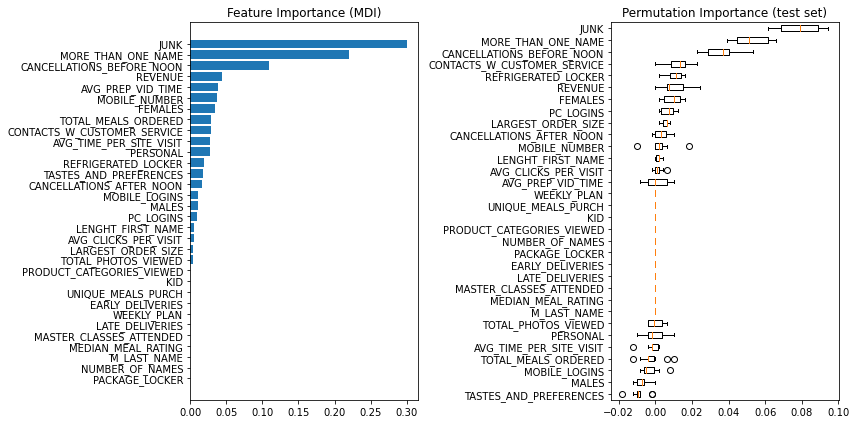

In [15]:
#Create a feature importance bar chart to drop features and continue to a next iteration
model = gbm_tuned
model_data = appchef_data1

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(model_data.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(model, x_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(model_data.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

AS WE CAN SEE, THERE ARE PLENTY OF FEATURES THAT HAVE LITTLE RELEVANCE, SO I WILL REMOVE THEM AND DO A NEW ITERATION OF MY GBM MODEL WITH LESS VARIABLES

## Second Iteration

In [16]:
#2nd ITERATION RANDOM FOREST
reduced_variables = ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',\
              'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'LATE_DELIVERIES', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',\
              'PERSONAL', 'JUNK', 'MALES', 'NUMBER_OF_NAMES', 'LENGHT_FIRST_NAME', 'MORE_THAN_ONE_NAME']

appchef_data2 = dataset.copy()

appchef_data2 = appchef_data2.loc[ : , reduced_variables]

# declaring response variable
appchef_target2 = dataset.loc[:, 'CROSS_SELL_SUCCESS']

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            appchef_data2,
            appchef_target2,
            test_size    = 0.25,
            random_state = 219,
            stratify     = appchef_target2)

In [17]:
# declaring a hyperparameter space
learn_space        = np.arange(0.1,3.0,0.2)    #Keeping learning_rate space the same
estimator_space    = pd.np.arange(10, 100, 5)
depth_space        = pd.np.arange(1,7,1)       #Reducing max_depth space to avoid overfitting
warm_start_space   = [True,False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'    : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator = full_gbm_grid,
                                 param_distributions = param_grid,
                                 cv                  = 4,
                                 n_iter              = 20,
                                 random_state        = 219,
                                 scoring             = make_scorer(roc_auc_score,
                                                       needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(appchef_data2, appchef_target2)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))


<ipython-input-17-4c7ce4f50e05>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space    = pd.np.arange(10, 100, 5)
<ipython-input-17-4c7ce4f50e05>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(1,7,1)       #Reducing max_depth space to avoid overfitting


Tuned Parameters  : {'warm_start': False, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.30000000000000004}
Tuned Training AUC: 0.6615


In [18]:
# INSTANTIATING a GBM with best estimators
gbm_tuned_2 = full_gbm_cv.best_estimator_


# PREDICTING based on the testing set
gbm_tuned_2_pred = gbm_tuned_2.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_2.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_2.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_2_pred).round(4))


# saving scoring data for future use
gbm_tuned_2_train_score = gbm_tuned_2.score(x_train, y_train).round(4) # accuracy
gbm_tuned_2_test_score  = gbm_tuned_2.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
gbm_tuned_2_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = gbm_tuned_2_pred).round(4) # auc

Training ACCURACY: 0.8465
Testing  ACCURACY: 0.8645
AUC Score        : 0.8173


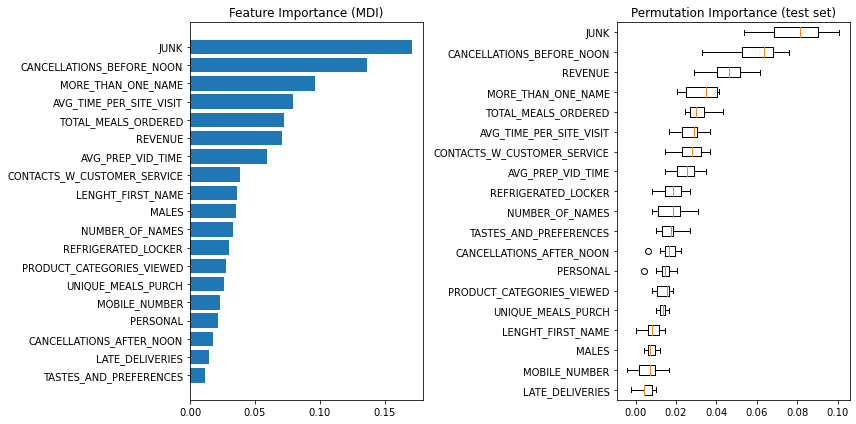

In [19]:
model = gbm_tuned_2
model_data = appchef_data2

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(model_data.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(model, x_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(model_data.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

NOT REMOVING ANY MORE VARIABLES AS THESE SEEM TO BE SIGNIFICANT ENOUGHT FOR THE MODEL

## Third iteration

In [20]:
#THIRD ITERATION

appchef_data3 = dataset.copy()
appchef_data3 = appchef_data3.loc[ : , reduced_variables]  #Same variables from previous iteration

# declaring response variabl
appchef_target3 = dataset.loc[:, 'CROSS_SELL_SUCCESS']

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            appchef_data3,
            appchef_target3,
            test_size    = 0.25,
            random_state = 219,
            stratify     = appchef_target3)

In [21]:
# declaring a hyperparameter space
learn_space        = np.arange(0.1,10.0,0.5)    # Increasing the upper bound of the learning_rate space and increasing it by steps of 5.
depth_space        = pd.np.arange(1,7,1)        # Keeping the max_depth the same
warm_start_space   = [True,False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,  
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'    : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator = full_gbm_grid,
                                 param_distributions = param_grid,
                                 cv                  = 4,
                                 n_iter              = 20,
                                 random_state        = 219,
                                 scoring             = make_scorer(roc_auc_score,
                                                       needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(appchef_data3, appchef_target3)


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))


<ipython-input-21-a61ea9428a17>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(1,7,1)        # Keeping the max_depth the same


Tuned Parameters  : {'warm_start': False, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.6}
Tuned Training AUC: 0.6409


In [22]:
# INSTANTIATING a GBM with best estimators
gbm_tuned_3 = full_gbm_cv.best_estimator_


# PREDICTING based on the testing set
gbm_tuned_3_pred = gbm_tuned_3.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_3.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_3.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_3_pred).round(4))


# saving scoring data for future use
gbm_tuned_3_train_score = gbm_tuned_3.score(x_train, y_train).round(4) # accuracy
gbm_tuned_3_test_score  = gbm_tuned_3.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
gbm_tuned_3_auc         = roc_auc_score(y_true  = y_test,
                                        y_score = gbm_tuned_3_pred).round(4) # auc

Training ACCURACY: 0.8903
Testing  ACCURACY: 0.924
AUC Score        : 0.8916


# RESULTS

In [23]:
#Creating a dataframe with saved results
data = {'GBM_TRAIN': [gbm_tuned_train_score, gbm_tuned_2_train_score, gbm_tuned_3_train_score],
       'GBM_TEST': [gbm_tuned_test_score, gbm_tuned_2_test_score, gbm_tuned_3_test_score],
       'GBM_GAP': [abs(gbm_tuned_train_score-gbm_tuned_test_score), abs(gbm_tuned_2_train_score-gbm_tuned_2_test_score), abs(gbm_tuned_3_train_score-gbm_tuned_3_test_score)],
       'GAP < 0.05': [abs(gbm_tuned_train_score-gbm_tuned_test_score)<0.05, abs(gbm_tuned_2_train_score-gbm_tuned_2_test_score)<0.05, abs(gbm_tuned_3_train_score-gbm_tuned_3_test_score)<0.05],
       'GBM_AUC': [gbm_tuned_auc, gbm_tuned_2_auc, gbm_tuned_3_auc]}

results = pd.DataFrame(data=data)

results.index = ['iter1', 'iter2', 'iter3']

results

,GBM_TRAIN,GBM_TEST,GBM_GAP,GAP < 0.05,GBM_AUC
iter1,0.7752,0.7885,0.0133,True,0.7224
iter2,0.8465,0.8645,0.0180,True,0.8173
iter3,0.8903,0.9240,0.0337,True,0.8916


In [24]:
#Confusion matrix results
gbm_final_tn, \
gbm_final_fp, \
gbm_final_fn, \
gbm_final_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_3_pred).ravel()

In [25]:
# Comparing results

print(f"""

CLASSIFICATION MODEL RESULTS:


Iteration       GBM_Train Score      GBM_Test_Score      GBM_GAP     GAP < 0.05       GBM_AUC
-----           ---------------      --------------      -------     ----------       -------
1                   {gbm_tuned_train_score}              {gbm_tuned_test_score}            {round(abs(gbm_tuned_train_score-gbm_tuned_test_score),2)}          {abs(gbm_tuned_train_score-gbm_tuned_test_score)<0.05}          {gbm_tuned_auc}          
2                   {gbm_tuned_2_train_score}              {gbm_tuned_2_test_score}            {round(abs(gbm_tuned_2_train_score-gbm_tuned_2_test_score),2)}          {abs(gbm_tuned_2_train_score-gbm_tuned_2_test_score)<0.05}          {gbm_tuned_2_auc}          
3                   {gbm_tuned_3_train_score}              {gbm_tuned_3_test_score}             {round(abs(gbm_tuned_3_train_score-gbm_tuned_3_test_score),2)}          {abs(gbm_tuned_3_train_score-gbm_tuned_3_test_score)<0.05}          {gbm_tuned_3_auc}          

 
CONFUSION MATRIX:

True Negatives : {gbm_final_tn}
False Positives: {gbm_final_fp}
False Negatives: {gbm_final_fn}
True Positives : {gbm_final_tp}
          """)





CLASSIFICATION MODEL RESULTS:


Iteration       GBM_Train Score      GBM_Test_Score      GBM_GAP     GAP < 0.05       GBM_AUC
-----           ---------------      --------------      -------     ----------       -------
1                   0.7752              0.7885            0.01          True          0.7224          
2                   0.8465              0.8645            0.02          True          0.8173          
3                   0.8903              0.924             0.03          True          0.8916          

 
CONFUSION MATRIX:

True Negatives : 125
False Positives: 31
False Negatives: 6
True Positives : 325
          


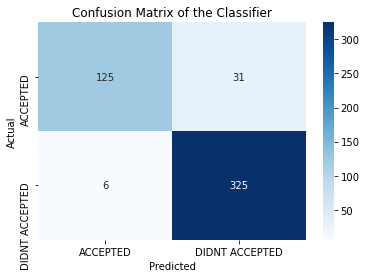

In [26]:
#Visual Confusion Matrix
visual_cm(true_y = y_test , pred_y = gbm_tuned_3_pred , labels=['ACCEPTED', 'DIDNT ACCEPTED'])